In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib as mpl
import matplotlib.patches as ptc
mpl.rcParams['figure.dpi'] = 500

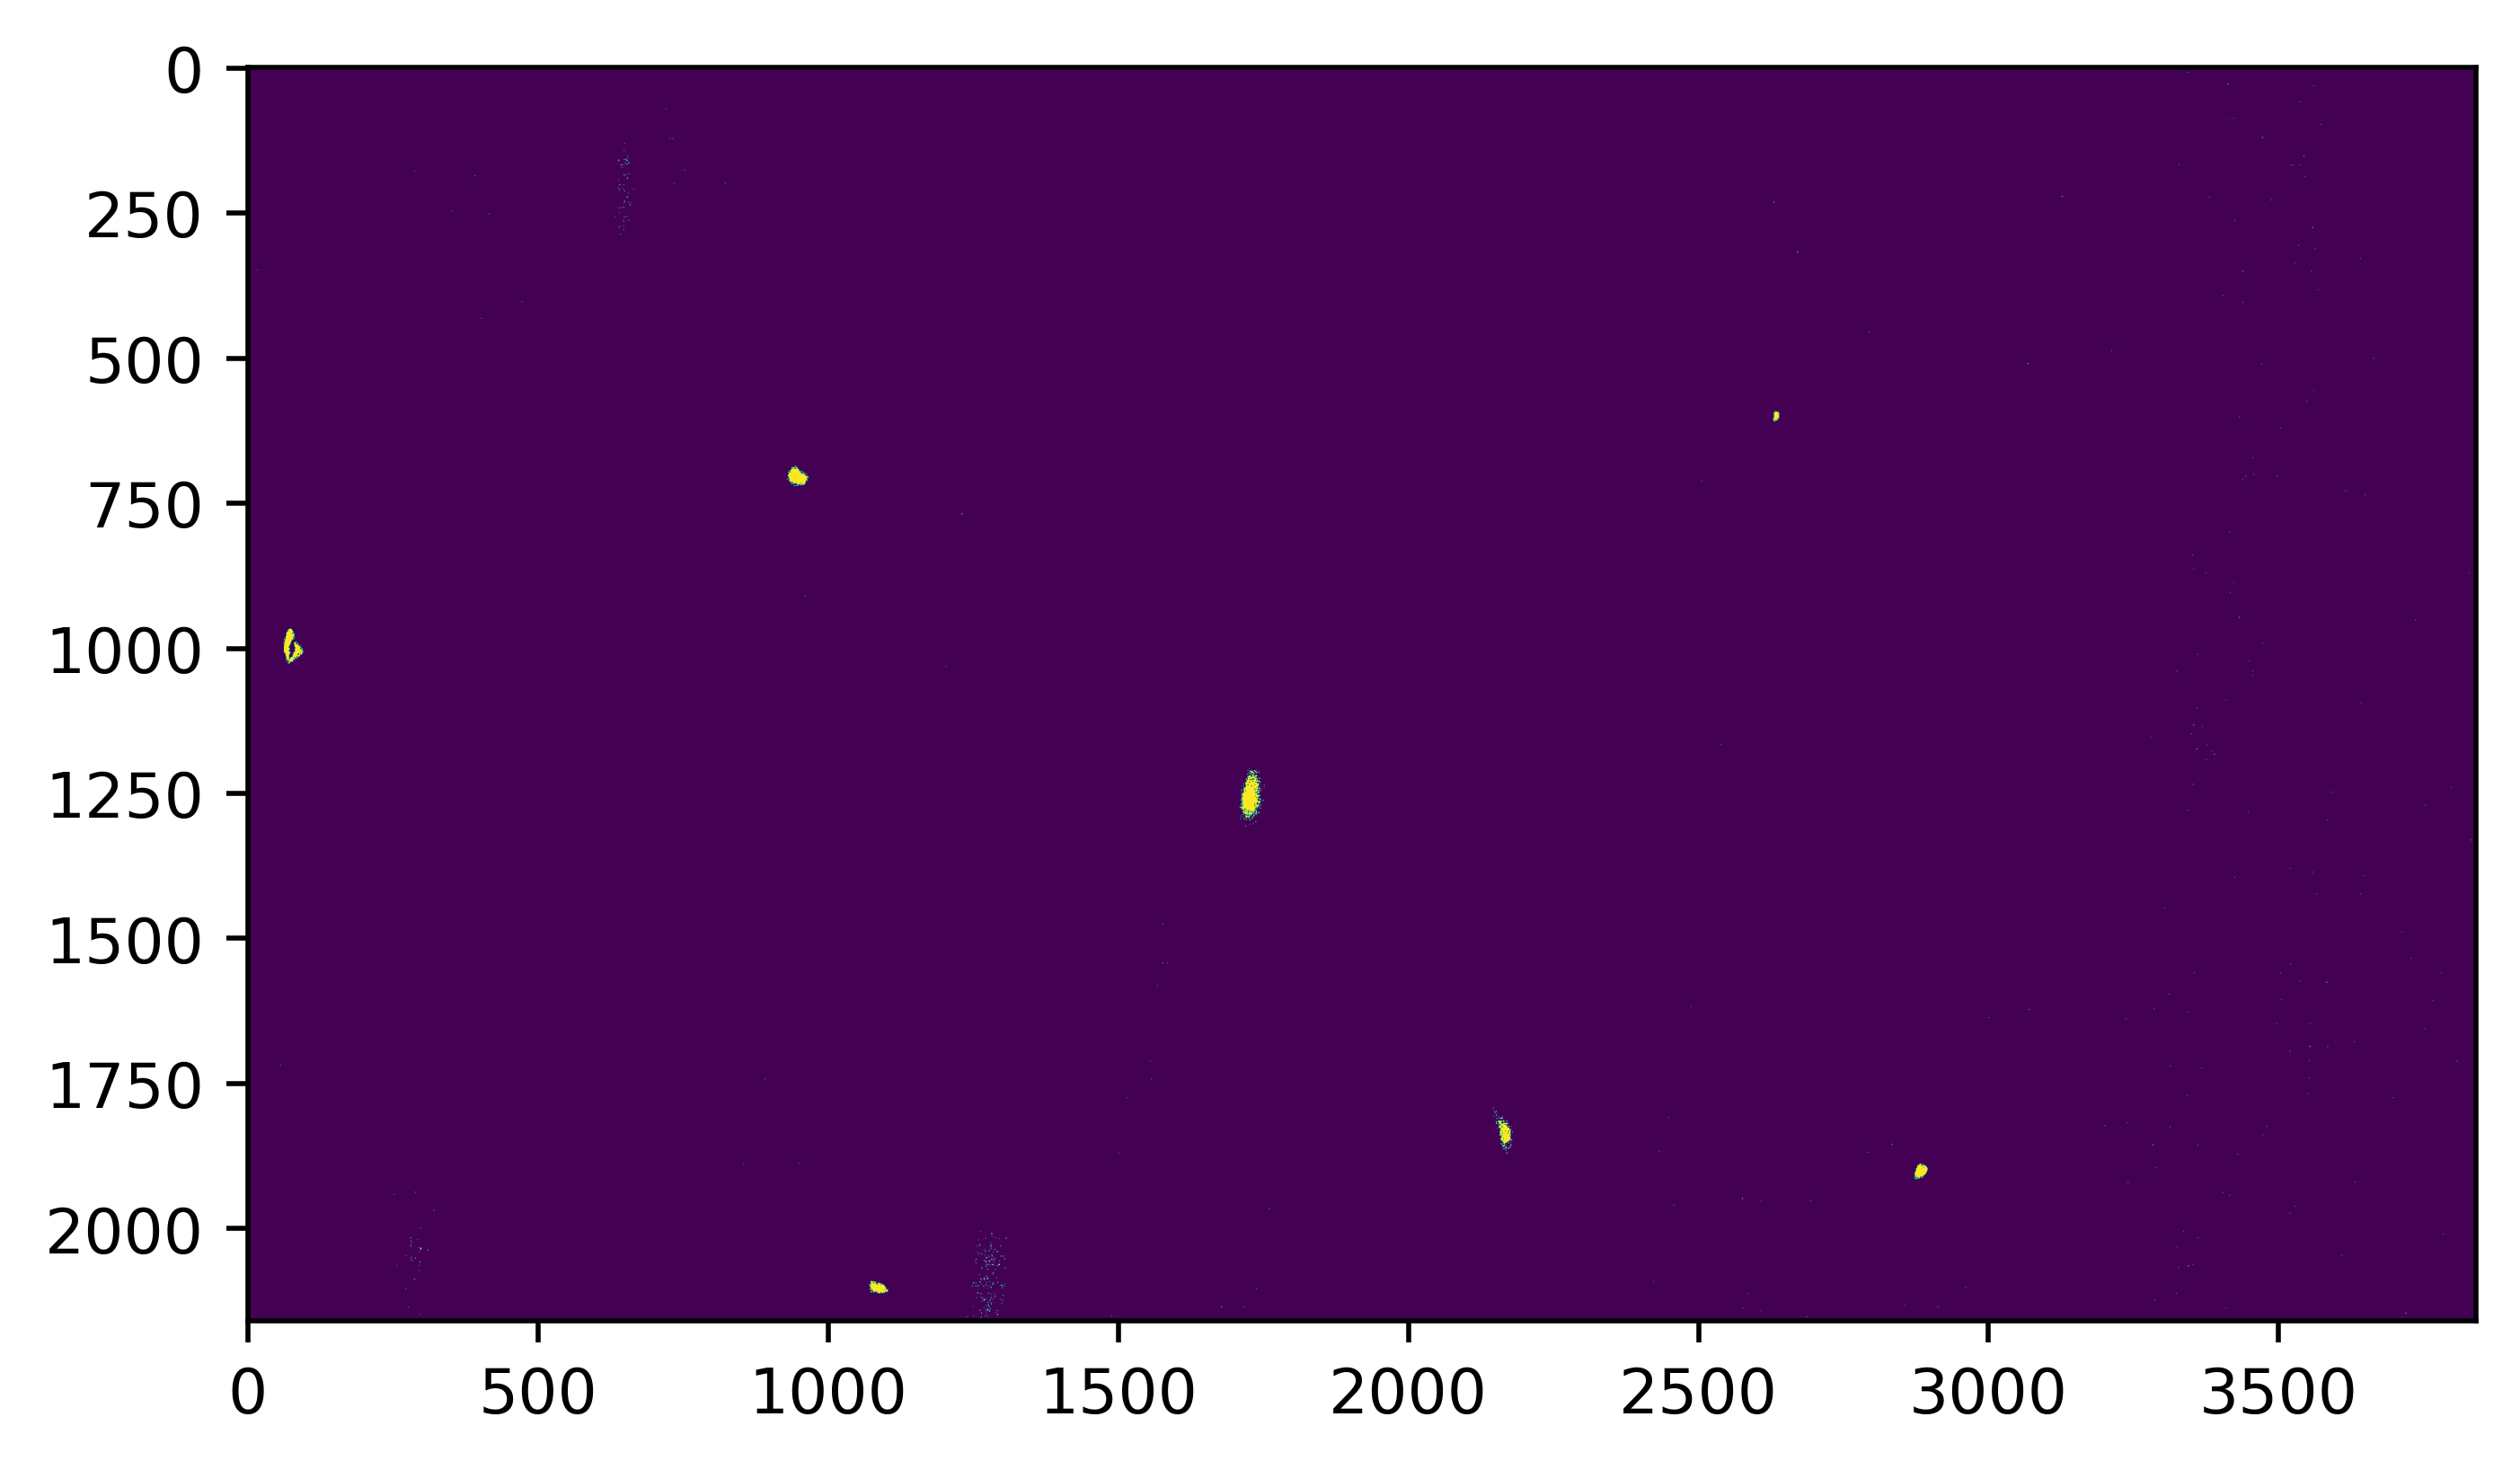

In [19]:
import cv2
import matplotlib.pyplot as plt
import os

# Change the current directory to the one containing your images
os.chdir('/Users/braydennoh/Downloads/Last100Frames')

# Read the image
image = cv2.imread('frame_050.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold
_, thresh = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

In [3]:
import cv2
import numpy as np
import os

# Set the directory containing your images
image_directory = '/Users/braydennoh/Downloads/floc/80clay/images'


# Define a function to process a single frame
def process_frame(frame_path):
    # Read the image
    image = cv2.imread(frame_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply threshold
    _, thresh = cv2.threshold(gray, 165, 255, cv2.THRESH_BINARY_INV)

    # Find contours of the particles in the noisy, thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Prepare a list to store the measurements
    measurements = []

    for contour in contours:
        x, y, width, height = cv2.boundingRect(contour)
        if width >= 15 and height >= 20:  # Check if the contour meets the minimum size requirements
            area = cv2.contourArea(contour)
            M = cv2.moments(contour)
            ratio = width/height
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX, cY = 0, 0  # Assign some default value if area is zero to avoid division by zero
            measurements.append((area, width, height, ratio,cX, cY))

    # Create a unique text file for each frame and write the measurements and centroid coordinates to it
    frame_filename = os.path.basename(frame_path)
    output_file = os.path.splitext(frame_filename)[0] + '_measurements.txt'
    output_path = os.path.join(image_directory, output_file)
    with open(output_path, 'w') as file:
        for area, width, height, ratio, cX, cY in measurements:
            file.write(f"{area}\t{width}\t{height}\t{ratio}\t{cX}\t{cY}\n")
        print(f"Measurements and centroid coordinates for {frame_path} saved to {output_file}")

print("Measurements and centroid coordinates saved to particle_measurements.txt")

# Loop through frames from frame_001 to frame_012
for frame_number in range(3400, 3500):
    frame_filename = f'frame{str(frame_number).zfill(3)}.jpg'  # Format the filename with leading zeros
    frame_path = os.path.join(image_directory, frame_filename)
    process_frame(frame_path)

print("Processing complete.")


Measurements and centroid coordinates saved to particle_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3400.jpg saved to frame3400_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3401.jpg saved to frame3401_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3402.jpg saved to frame3402_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3403.jpg saved to frame3403_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3404.jpg saved to frame3404_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3405.jpg saved to frame3405_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/fram

Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3463.jpg saved to frame3463_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3464.jpg saved to frame3464_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3465.jpg saved to frame3465_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3466.jpg saved to frame3466_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3467.jpg saved to frame3467_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3468.jpg saved to frame3468_measurements.txt
Measurements and centroid coordinates for /Users/braydennoh/Downloads/floc/80clay/images/frame3469.jpg saved to frame3469_measurements.txt
Measurements and centroid c

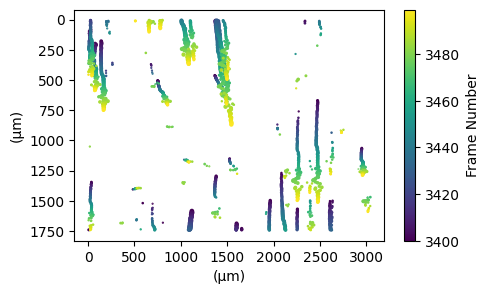

In [5]:
import matplotlib.pyplot as plt
import os

# Set the directory containing your measurement files
measurement_directory = '/Users/braydennoh/Downloads/floc/80clay/images'

# Lists to store the X and Y coordinates, areas, and frame numbers
all_x_coords = []
all_y_coords = []
all_areas = []
frame_numbers = []

# Loop through frames from frame_001 to frame_074 and read their respective measurement files
for frame_number in range(3400, 3500):
    frame_filename = f'frame{frame_number:03}_measurements.txt'  # Updated to use f-string formatting directly
    measurement_file = os.path.join(measurement_directory, frame_filename)

    # Temporary lists for the current frame's data
    x_coords = []
    y_coords = []
    areas = []

    # Reading the measurement file and extracting the required information
    with open(measurement_file, 'r') as file:
        for line in file:
            # Expecting the line format: area, width, height, ratio, cX, cY
            area, _, _, _, x, y = line.strip().split('\t')  # Updated to match the file format
            areas.append(float(area))
            x_coords.append(float(x))  # Keep as float
            y_coords.append(float(y))  # Keep as float

    # Extending the all_* lists with the current frame's data
    all_x_coords.extend(x_coords)
    all_y_coords.extend(y_coords)
    all_areas.extend(areas)
    frame_numbers.extend([frame_number] * len(x_coords))

all_x_coords_microns = [x * 0.81 for x in all_x_coords]
all_y_coords_microns = [y * 0.81 for y in all_y_coords]

# Normalize areas for visualization, ensuring the scatter sizes are not too small or too large
max_area = max(all_areas)
normalized_areas = [(area / max_area) * 10 for area in all_areas]

# Creating the scatter plot with unique colors for each frame, now in microns
plt.figure(figsize=(5, 3))
scatter = plt.scatter(all_x_coords_microns, all_y_coords_microns, s=normalized_areas, c=frame_numbers, cmap='viridis')
plt.colorbar(scatter, label='Frame Number')
plt.xlabel('(µm)')
plt.ylabel('(µm)')
plt.gca().invert_yaxis()

plt.show()


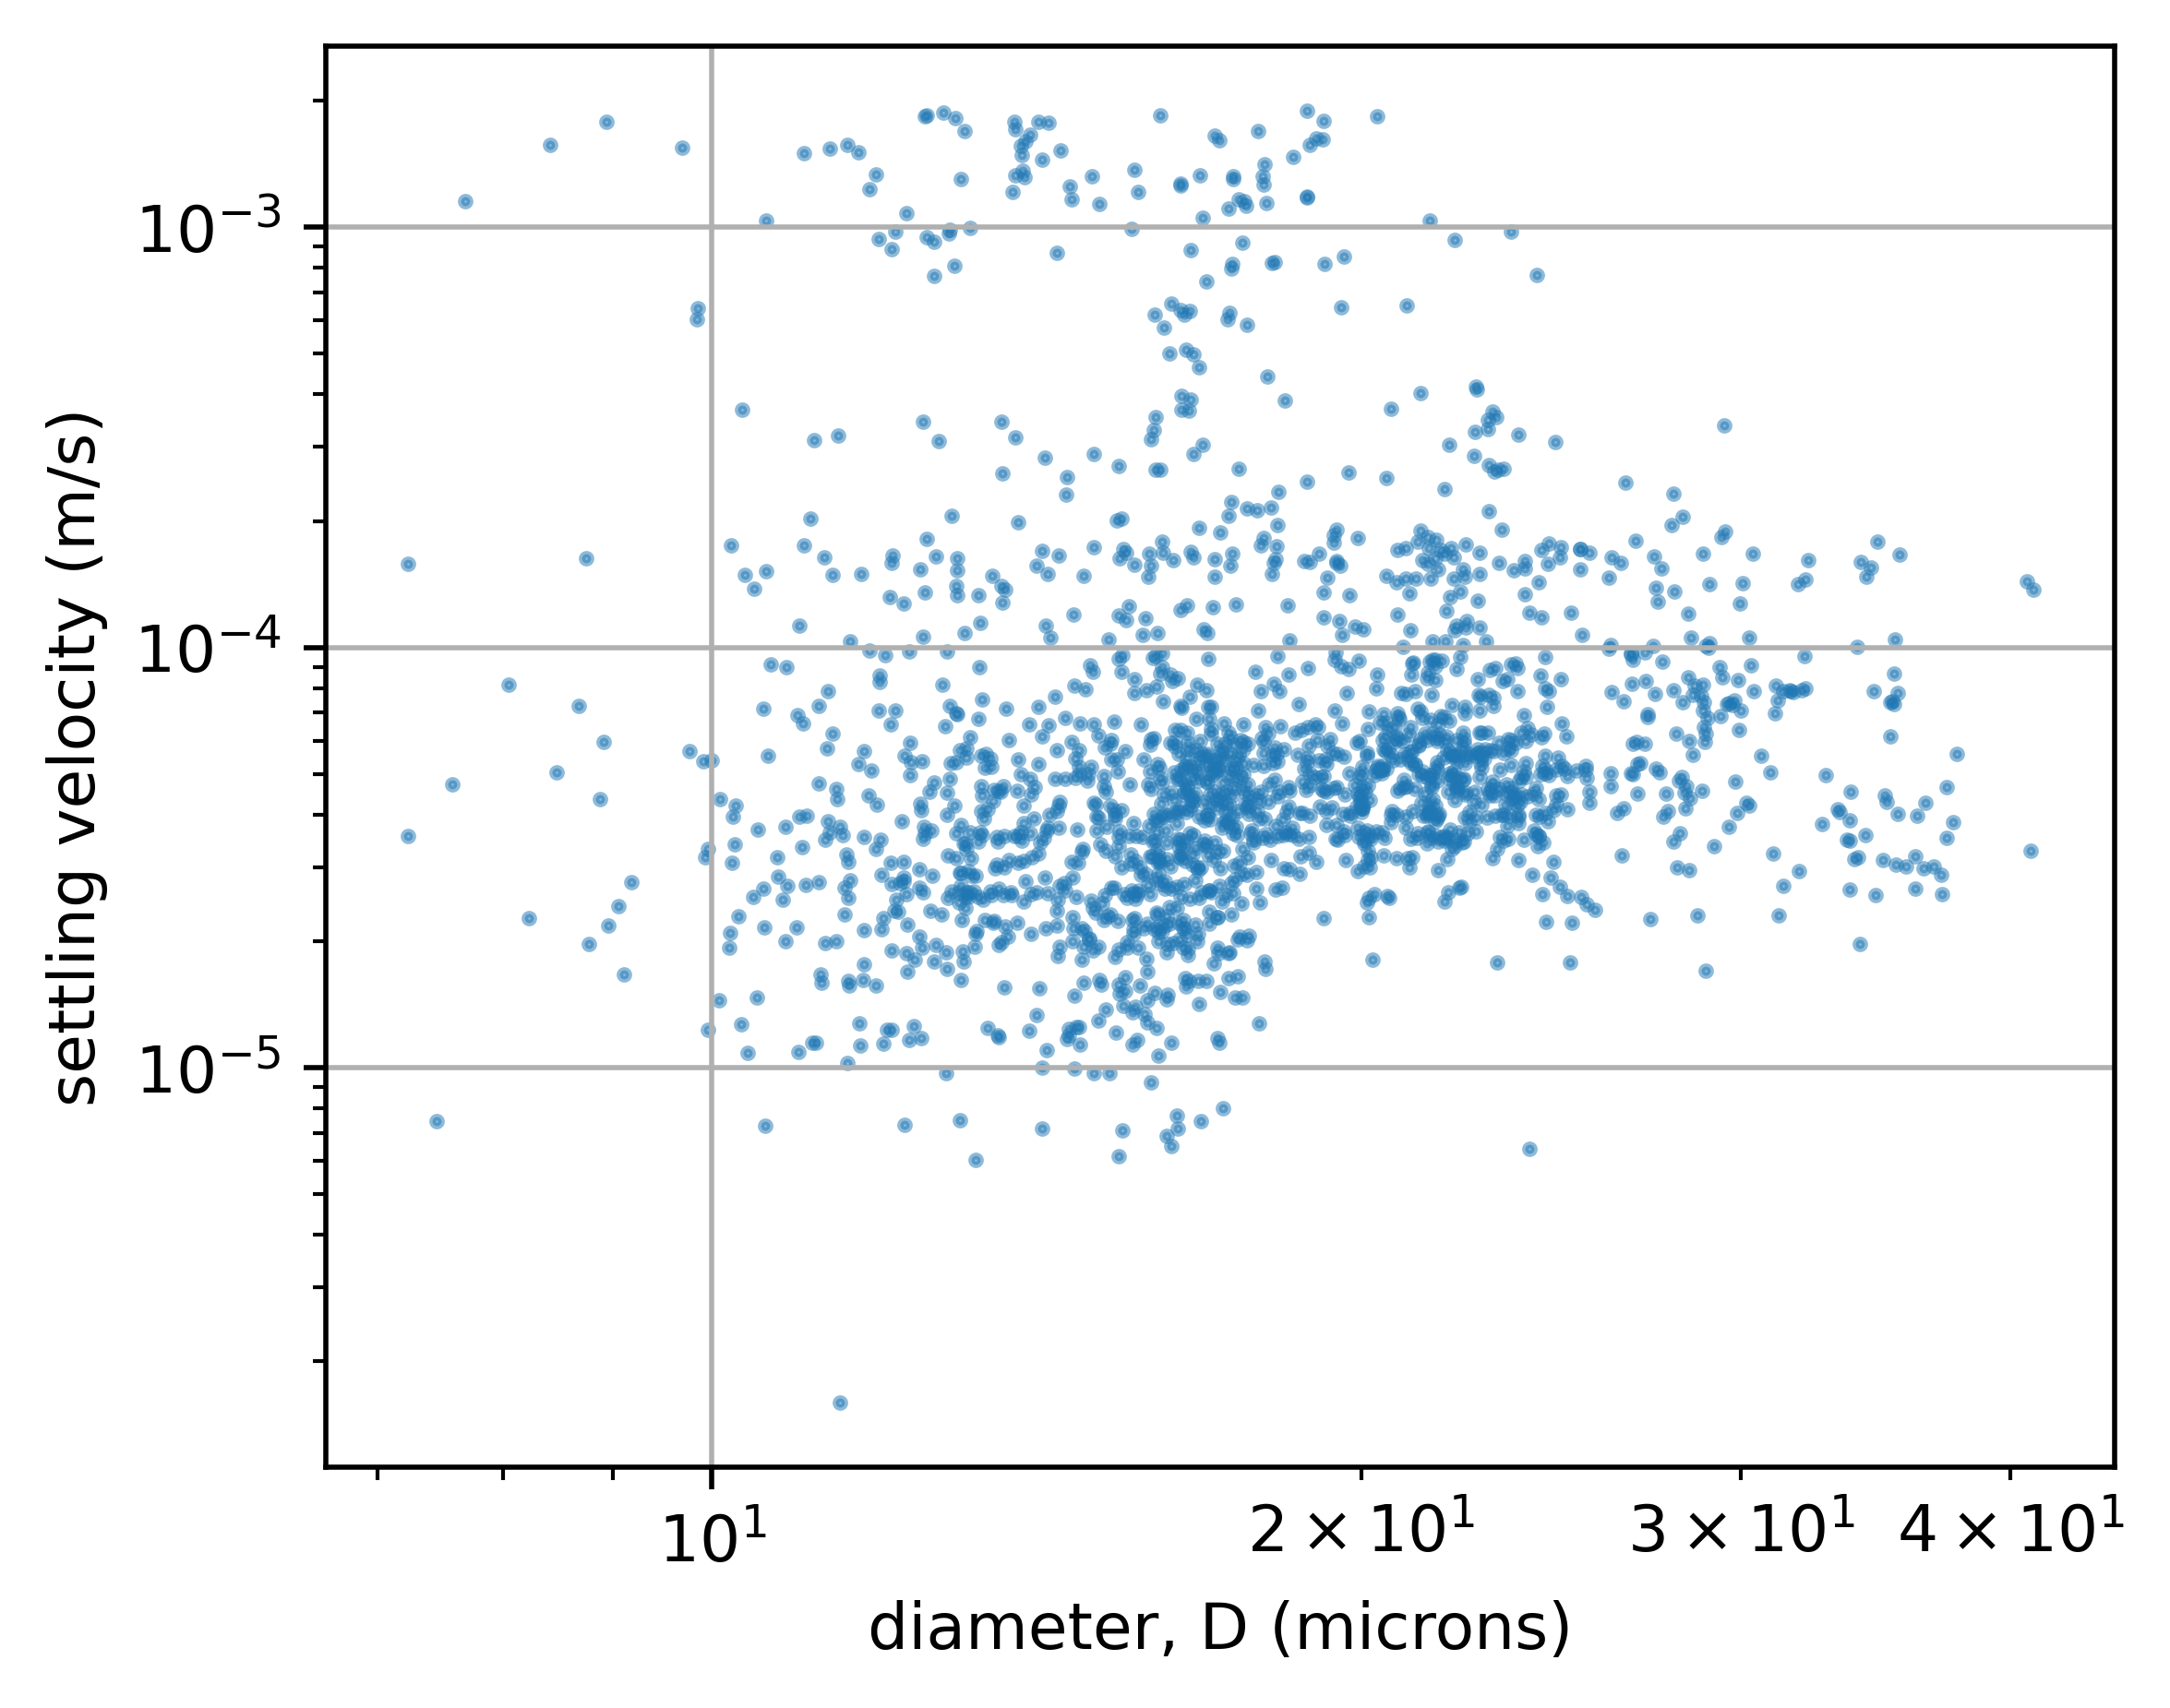

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os

def read_particle_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            area, width, height, ratio, cX, cY = map(float, line.strip().split('\t'))
            data.append({'area': area, 'width': width, 'height': height, 'ratio': ratio, 'cX': cX, 'cY': cY})
    return data

def find_local_matches(particles_frame1, particles_frame2, search_radius, size_weight=0.5, dimension_weight=0.3):
    """
    Find matches between particles in two consecutive frames based on spatial distance, size, and dimension similarity.
    
    :param particles_frame1: List of particle dictionaries in frame 1
    :param particles_frame2: List of particle dictionaries in frame 2
    :param search_radius: Maximum allowed distance for matching particles
    :param size_weight: Weight of the size difference in the score (0 to 1)
    :param dimension_weight: Weight of the height and width differences in the score (0 to 1)
    :return: List of matches (particle1, particle2, distance)
    """
    matches = []
    for particle1 in particles_frame1:
        local_matches = []
        for particle2 in particles_frame2:
            distance = np.sqrt((particle1['cX'] - particle2['cX'])**2 + (particle1['cY'] - particle2['cY'])**2)
            if distance <= search_radius:
                height_diff = abs(particle1['height'] - particle2['height'])
                width_diff = abs(particle1['width'] - particle2['width'])
                
                avg_height = (particle1['height'] + particle2['height']) / 2
                avg_width = (particle1['width'] + particle2['width']) / 2
                normalized_height_diff = height_diff / avg_height if avg_height != 0 else 0
                normalized_width_diff = width_diff / avg_width if avg_width != 0 else 0
                
                score = (1 - size_weight - dimension_weight) * distance + \
                        size_weight * normalized_height_diff + \
                        dimension_weight * normalized_width_diff
                
                local_matches.append((particle2, score))
        
        local_matches.sort(key=lambda x: x[1])
        
        if local_matches:
            matches.append((particle1, local_matches[0][0], local_matches[0][1]))
    
    return matches

def calculate_distance_and_average_area(matches):
    distances = []
    average_areas = []
    for particle1, particle2, distance in matches:
        avg_area = (particle1['area'] + particle2['area']) / 2
        distances.append(distance)
        average_areas.append(avg_area)
    return distances, average_areas

def calculate_diameter_from_area(area_in_micron_squared):
    return 2 * np.sqrt(area_in_micron_squared / np.pi)

def process_frame_pairs(directory, start_frame, end_frame):
    all_distances = []
    all_diameters = []

    for frame_number in range(start_frame, end_frame):
        file1 = os.path.join(directory, f'frame{frame_number:03}_measurements.txt')
        file2 = os.path.join(directory, f'frame{frame_number+1:03}_measurements.txt')
        
        particles_frame1 = read_particle_data(file1)
        particles_frame2 = read_particle_data(file2)
        
        search_radius = 800
        matches = find_local_matches(particles_frame1, particles_frame2, search_radius)
        
        distances, average_areas = calculate_distance_and_average_area(matches)
        for area in average_areas:
            area_in_micron_squared = area * (0.81 ** 2)  # Convert area from pixel^2 to micron^2
            area_in_meters_squared = area_in_micron_squared * (1e-6 ** 2)  # Convert area from micron^2 to meter^2
            diameter_in_meters = calculate_diameter_from_area(area_in_micron_squared)
            all_diameters.append(diameter_in_meters)
        
        all_distances.extend([distance * 0.81 * 1e-6 for distance in distances])  # Convert distances directly to meters

    return all_distances, all_diameters

# Directory and frame range setup
directory = '/Users/braydennoh/Downloads/floc/80clay/images'

start_frame = 3400
end_frame = 3499

all_distances, all_diameters = process_frame_pairs(directory, start_frame, end_frame)
distances_per_second = [distance * 30 for distance in all_distances]

plt.figure(figsize=(5, 4))

plt.scatter(all_diameters, distances_per_second, s=2, alpha=0.5)
plt.xlabel('diameter, D (microns)')
plt.ylabel('settling velocity (m/s)')
#plt.ylim([1e-4,1e-2])
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

Text(0.5, 0, 'diameter (m)')

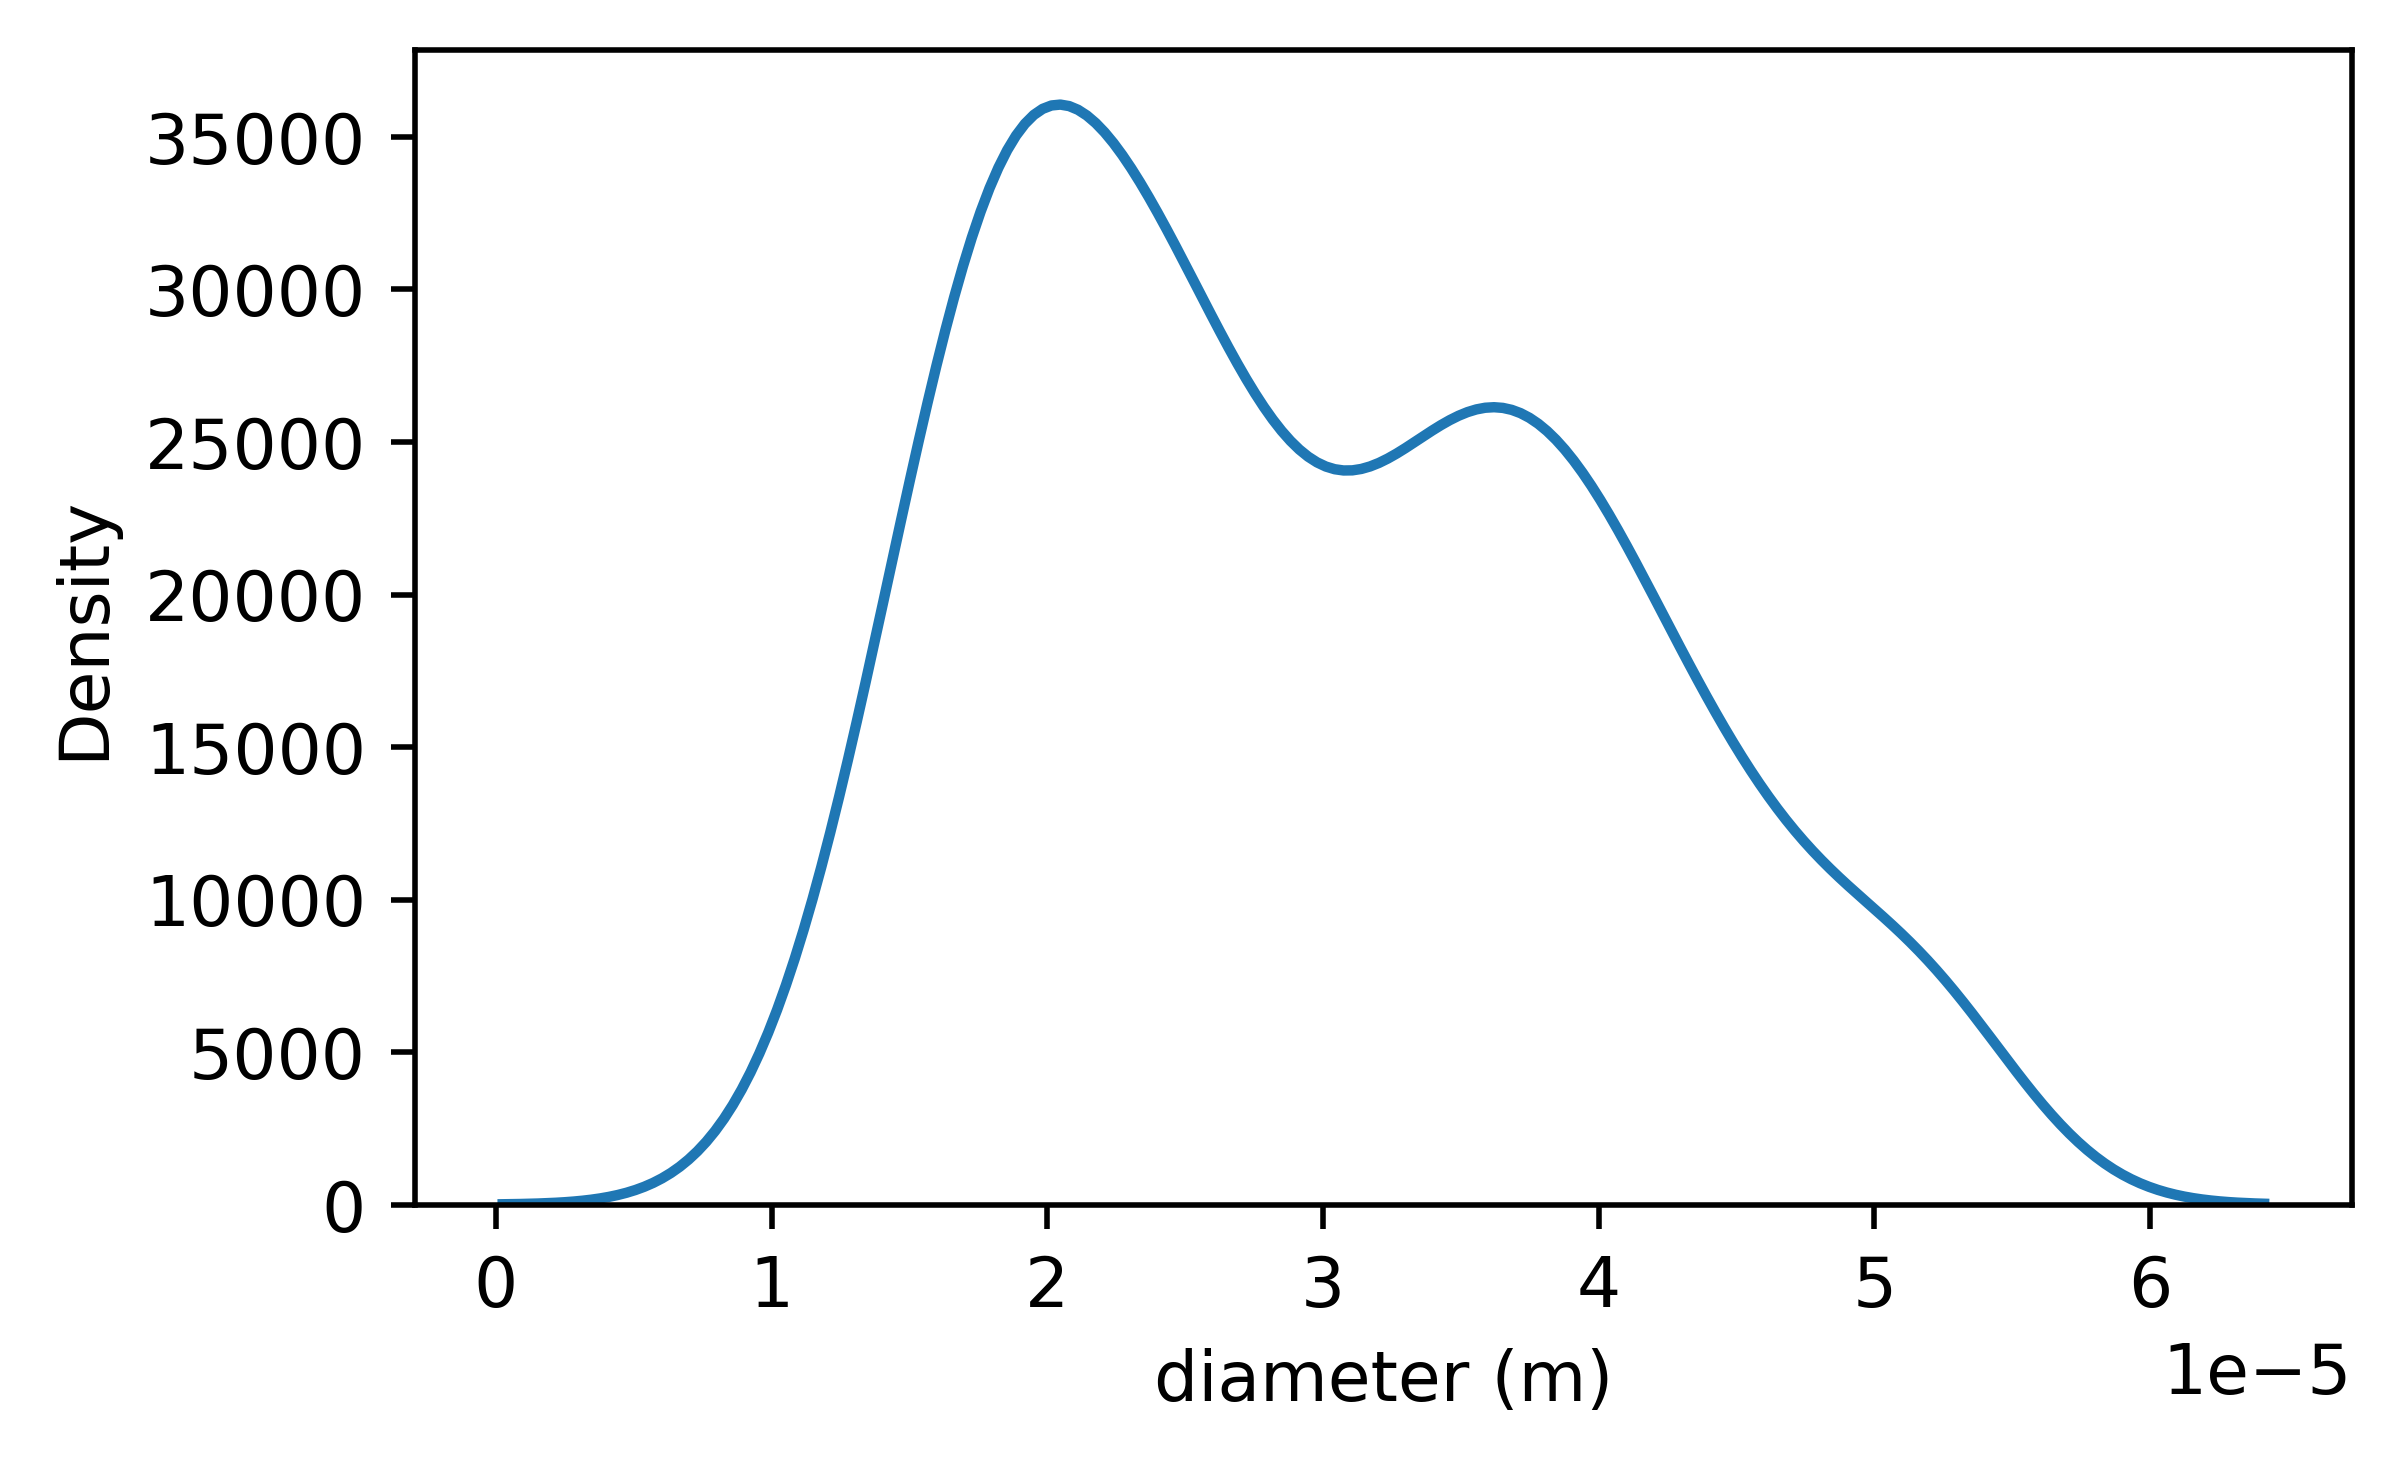

In [32]:
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.kdeplot(all_diameters)
plt.xlabel('diameter (m)')

In [9]:
distances_per_second

[0.0002420658203535478,
 0.0017383542024978608,
 0.001447635735448293,
 0.0014559132164734983,
 0.0014500130028813774,
 0.001378922532755692,
 0.0014894532318941744,
 0.0016102319642086558,
 0.0014903323750876465,
 0.001658132952525642,
 0.0016436924732782063,
 0.0012033790616841325,
 0.0013584493809118857,
 0.0016957649798802763,
 0.001730724361173655,
 0.0009631974624108335,
 0.001836949060087086,
 0.00174597165592373,
 0.001062571836016362,
 0.001071704568585884,
 0.0010110995833944403,
 0.0009872488616799395,
 0.0016951372478164668,
 0.0017103240599473258,
 0.0010194539043176592,
 0.0010005306040872372,
 0.0010497081455162476,
 0.0010381584100055564,
 0.00011345576084934691,
 5.975676248519683e-05,
 0.0017124626326959606,
 0.0005201991120613588,
 0.000697751388426775,
 0.0007606725406236811,
 0.0007797468902382373,
 0.0008093417414378429,
 0.0008303454973033735,
 0.0007579207636463932,
 0.0008010373868220571,
 0.0018326205099723088,
 0.001881838490668182,
 0.001934247910015264,
 0.

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
import os
import imageio
from PIL import Image
import io


search_radius = 50
def read_particle_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            area, width, height, ratio, cX, cY = map(float, line.strip().split('\t'))
            data.append({'area': area, 'width': width, 'height': height, 'ratio': ratio, 'cX': cX, 'cY': cY})
    return data

def find_local_matches(particles_frame1, particles_frame2, search_radius = 1, size_weight=0.5, dimension_weight=0.5):
    matches = []
    for particle1 in particles_frame1:
        local_matches = []
        for particle2 in particles_frame2:
            distance = np.sqrt((particle1['cX'] - particle2['cX'])**2 + (particle1['cY'] - particle2['cY'])**2)
            if distance <= search_radius:
                height_diff = abs(particle1['height'] - particle2['height'])
                width_diff = abs(particle1['width'] - particle2['width'])
                avg_height = (particle1['height'] + particle2['height']) / 2
                avg_width = (particle1['width'] + particle2['width']) / 2
                normalized_height_diff = height_diff / avg_height if avg_height != 0 else 0
                normalized_width_diff = width_diff / avg_width if avg_width != 0 else 0
                score = (1 - size_weight - dimension_weight) * distance + \
                        size_weight * normalized_height_diff + \
                        dimension_weight * normalized_width_diff
                local_matches.append((particle2, score))
        local_matches.sort(key=lambda x: x[1])
        if local_matches:
            matches.append((particle1, local_matches[0][0], local_matches[0][1]))
    return matches

def plot_matched_particles(particles_frame1, particles_frame2, matches, output_filename):
    fig, ax = plt.subplots(figsize=(4, 2.5))
    for particle in particles_frame1:
        cX_microns = particle['cX'] * 0.81
        cY_microns = particle['cY'] * 0.81
        ax.plot(cX_microns, cY_microns, 'o', color='#132a3d', label='Frame 1')
    for particle in particles_frame2:
        cX_microns = particle['cX'] * 0.81
        cY_microns = particle['cY'] * 0.81
        ax.plot(cX_microns, cY_microns, 'o', color='#3b7fb9', label='Frame 2')
    for match in matches:
        particle1, particle2, _ = match
        #ax.plot([particle1['cX'] * 0.81, particle2['cX'] * 0.81], [particle1['cY'] * 0.81, particle2['cY'] * 0.81], 
               #'silver', linestyle='--', zorder=1)
    plt.xlabel('(µm)')
    plt.ylabel('(µm)')
    plt.xlim([0,3000])
    plt.ylim([0,2000])
    plt.gca().invert_yaxis()
    plt.savefig(output_filename)
    plt.close(fig)

def process_and_visualize(directory, start_frame, end_frame, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for frame_number in range(start_frame, end_frame):
        particles_frame1 = read_particle_data(os.path.join(directory, f'frame{frame_number:03}_measurements.txt'))
        particles_frame2 = read_particle_data(os.path.join(directory, f'frame{frame_number+1:03}_measurements.txt'))
        matches = find_local_matches(particles_frame1, particles_frame2, 500)
        output_filename = os.path.join(output_folder, f'matched{frame_number:03}_to_{frame_number+1:03}.png')
        plot_matched_particles(particles_frame1, particles_frame2, matches, output_filename)

    
def create_gif(image_folder, output_gif, fps=10, max_width=800, max_height=600):
    images = [os.path.join(image_folder, img) for img in sorted(os.listdir(image_folder)) if img.endswith(".png")]
    
    # Resize and reduce the color palette of each image
    optimized_frames = []
    for img in images:
        with Image.open(img) as im:
            # Resize image, maintaining aspect ratio
            im.thumbnail((max_width, max_height), Image.ANTIALIAS)
            
            # Convert to P mode which is for palettized images
            im = im.convert("P", palette=Image.ADAPTIVE, colors=256)
            
            # Save to a temporary buffer
            buffer = io.BytesIO()
            im.save(buffer, format="PNG")
            buffer.seek(0)
            
            # Read the image data from a buffer, equivalent to reading from a file
            frame = imageio.imread(buffer)
            optimized_frames.append(frame)
    
    # Save the optimized frames as a GIF
    imageio.mimsave(output_gif, optimized_frames, fps=fps)

directory = '/Users/braydennoh/Downloads/floc/80clay/images'
output_folder = os.path.join(directory, 'matched_plots')
process_and_visualize(directory, 3400, 3499, output_folder)
create_gif(output_folder, os.path.join(directory, 'particle_matches.gif'))

/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_28922/1057750422.py:84: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail((max_width, max_height), Image.ANTIALIAS)
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_28922/1057750422.py:95: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buffer)


In [34]:
import os
import imageio
import io
from PIL import Image

def create_gif_from_jpg_range(image_folder, output_gif, start_frame=3400, end_frame=3499, fps=10, max_width=800, max_height=600):
    # Generate the list of image filenames based on the specified range
    images = [os.path.join(image_folder, f'frame{frame}.jpg') for frame in range(start_frame, end_frame + 1)]
    
    optimized_frames = []
    for img in images:
        with Image.open(img) as im:
            # Resize image, maintaining aspect ratio
            im.thumbnail((max_width, max_height), Image.ANTIALIAS)
            
            # Convert to P mode which is for palettized images
            im = im.convert("P", palette=Image.ADAPTIVE, colors=256)
            
            # Save to a temporary buffer
            buffer = io.BytesIO()
            im.save(buffer, format="PNG")  # Save as PNG to buffer to keep transparency if present
            buffer.seek(0)
            
            # Read the image data from a buffer
            frame = imageio.imread(buffer)
            optimized_frames.append(frame)
    
    # Save the optimized frames as a GIF
    imageio.mimsave(output_gif, optimized_frames, fps=fps)

# Usage example:
image_folder = '/Users/braydennoh/Downloads/floc/80clay/images'
output_gif = os.path.join(image_folder, 'particle_matches_from_jpg.gif')
create_gif_from_jpg_range(image_folder, output_gif)


/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_28922/581007602.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail((max_width, max_height), Image.ANTIALIAS)
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_28922/581007602.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buffer)


In [36]:
from PIL import Image
import imageio
import os

def combine_gifs_side_by_side(gif1_path, gif2_path, output_path):
    # Load the first gif
    gif1 = imageio.mimread(gif1_path)
    # Load the second gif
    gif2 = imageio.mimread(gif2_path)
    
    # Assuming both gifs have the same lengths and frame rates
    combined_frames = []
    for frame1, frame2 in zip(gif1, gif2):
        # Convert to PIL images
        img1 = Image.fromarray(frame1)
        img2 = Image.fromarray(frame2)
        
        # Resize images to the same height if necessary
        if img1.height != img2.height:
            new_height = min(img1.height, img2.height)
            img1 = img1.resize((int(img1.width * new_height / img1.height), new_height), Image.ANTIALIAS)
            img2 = img2.resize((int(img2.width * new_height / img2.height), new_height), Image.ANTIALIAS)
        
        # Create a new image with a width that is the sum of both images
        total_width = img1.width + img2.width
        new_img = Image.new('RGBA', (total_width, img1.height))
        
        # Paste the images side by side
        new_img.paste(img1, (0, 0))
        new_img.paste(img2, (img1.width, 0))
        
        # Append to frames list
        combined_frames.append(new_img)
    
    # Save the combined frames as a new GIF
    combined_frames[0].save(output_path, save_all=True, append_images=combined_frames[1:], duration=100, loop=0)

# Paths to the GIFs
gif2_path = '/Users/braydennoh/Downloads/floc/80clay/images/particle_matches_from_jpg.gif'
gif1_path = '/Users/braydennoh/Downloads/floc/80clay/images/particle_matches.gif'

# Output path for the combined GIF
output_path = '/Users/braydennoh/Downloads/floc/80clay/images/combined_gif.gif'

# Combine the GIFs
combine_gifs_side_by_side(gif2_path, gif1_path, output_path)


/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_28922/1904788164.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img1 = img1.resize((int(img1.width * new_height / img1.height), new_height), Image.ANTIALIAS)
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_28922/1904788164.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img2 = img2.resize((int(img2.width * new_height / img2.height), new_height), Image.ANTIALIAS)
